#RNA synthesis of a ncRNA family

We want to design new RNA sequences whose traits comply with a given RNA family. 
For this purpose we use EDeN to come up with a notion of "importance" in
existing sequences, calculate sequence constraints based on this importance, and then utilize antaRNA for RNA inverse folding using these constraints. 

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import logging
from eden.util import configure_logging
configure_logging(logging.getLogger(), verbosity=2, filename='rna.log')

*Define experimental parameters*

In [3]:
params = {'rfam_id':'RF00005',
          'antaRNA_params':'../evaluation/antaRNA.ini' ,
          'importance_threshold_sequence_constraint':0 , 
          'min_size_connected_component_sequence_constraint':1 , 
          'importance_threshold_structure_constraint':0 ,
          'min_size_connected_component_structure_constraint':1 , 
          'min_size_connected_component_unpaired_structure_constraint':1 , 
          'n_synthesized_sequences_per_seed_sequence':1 , 
          'instance_score_threshold':0 , 
          'data_fractions':[0.06,0.1, 0.2,0.3] , 
          'n_experiment_repetitions':5 ,
          'train_to_test_split_ratio':0.2,
          'vectorizer_complexity':2,
          'negative_shuffle_ratio':2}

*Run the experiment*

In [4]:
%%time
from evaluation.PerformanceEvaluation import compute_learning_curves
roc_t , roc_s , apr_t , apr_s, data_fractions  = compute_learning_curves(params)

Starting RNA Synthesis experiment for RF00005 ...
Starting new HTTP connection (1): rfam.xfam.org
"GET /family/RF00005/alignment?acc=RF00005&format=fastau&download=0 HTTP/1.1" 200 90476
Training on data chunk 0/4 (data fraction: 0.1)
--------------------------------------------------------------------------------
run 1/5
Fit estimator on original data
Positive data: Instances: 11 ; Features: 1048577 with an avg of 550 features per instance
Negative data: Instances: 22 ; Features: 1048577 with an avg of 530 features per instance
Elapsed time: 1.5 secs
Evaluate estimator:
Test set
Instances: 2291 ; Features: 1048577 with an avg of 542 features per instance
--------------------------------------------------------------------------------
Test Estimate
             precision    recall  f1-score   support

         -1       0.77      0.89      0.83      1527
          1       0.69      0.47      0.56       764

avg / total       0.74      0.75      0.74      2291

APR: 0.684
ROC: 0.767
Fit e

*Plot the computed learning curves*

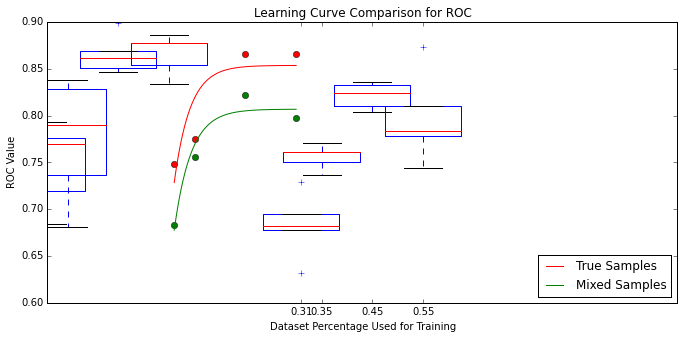

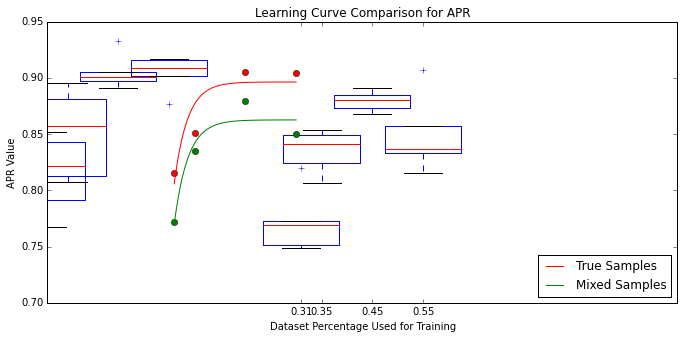

In [5]:
from evaluation.draw_utils import  draw_learning_curve
draw_learning_curve(data_A=roc_t, data_B=roc_s, x=data_fractions, measure='ROC')
draw_learning_curve(data_A=apr_t, data_B=apr_s, x=data_fractions, measure='APR')